In [1]:
import pandas as pd

In [15]:
df = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C'],
    'Column3': [10.5, 20.5, 30.5]
})
print(df)

   Column1 Column2  Column3
0        1       A     10.5
1        2       B     20.5
2        3       C     30.5


In [11]:
df.head()

,Column1,Column2,Column3
0,1,A,10.5
1,2,B,20.5
2,3,C,30.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  3 non-null      int64  
 1   Column2  3 non-null      object 
 2   Column3  3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


In [13]:
df.describe()

,Column1,Column3
count,3.0,3.0
mean,2.0,20.5
std,1.0,10.0
min,1.0,10.5
25%,1.5,15.5
50%,2.0,20.5
75%,2.5,25.5
max,3.0,30.5


In [17]:
# oszlop eldobása új adatkeret létrehozásával
df2 = df.drop(columns=['Column1'], axis = 1, inplace = False)
df.head()

,Column1,Column2,Column3
0,1,A,10.5
1,2,B,20.5
2,3,C,30.5


In [18]:
df2.head()

,Column2,Column3
0,A,10.5
1,B,20.5
2,C,30.5


In [19]:
df.drop(columns=['Column1'], axis = 1, inplace = True)
df.head()

,Column2,Column3
0,A,10.5
1,B,20.5
2,C,30.5


In [ ]:
df.assign(Column4 = [x for x in range(1, 4)]).head()

,Column2,Column3,Column4
0,A,10.5,1
1,B,20.5,2
2,C,30.5,3


In [22]:
df.query('Column3 > 15')

,Column2,Column3
1,B,20.5
2,C,30.5


In [28]:
df.query('Column3 == 10.5 or Column3 == 20.5')

,Column2,Column3
0,A,10.5
1,B,20.5


In [26]:
df.query('Column2 == "B"')

,Column2,Column3
1,B,20.5


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('titanic.csv')

PassengerId - azonosító
Survived - 1 túlélte 0 nem élte túl 
Pclass - Osztály
Name - név
Sex - nem
Age -kor
Sib/Sp - testvérek házastársak száma a fedélzeten
Parch - szülők gyerekek száma a fedélzeten
Fare - jegy ára
Cabin - Ha volt, a kabinnak a száma
Embarked - Beszállás kikötője

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Hiányzó adatok kezelése
Kategóriák numerikus értékké alakítása

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Sex'] = data['Sex'].astype(int)

C:\Users\Benedek\AppData\Local\Temp\ipykernel_15496\3294080177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Készítsünk előzetes elemzéseket vizualizáció alapján
pl: korrelációs mátrix

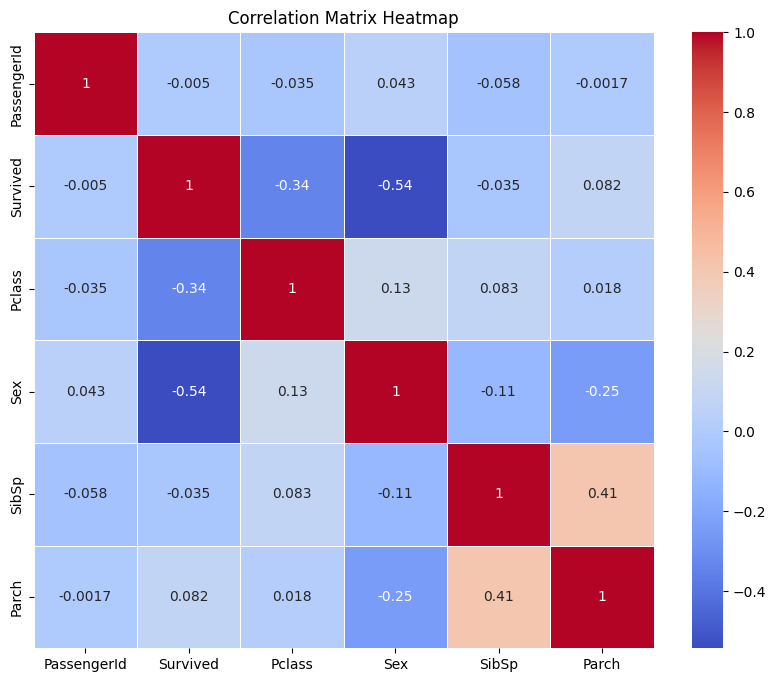

In [11]:
# Calculate the correlation matrix
corr_matrix = data.select_dtypes(include=['int64', 'int32']).corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Készítsünk egy boxplotot ami osztályokra bontva bemutatja a túlélők arányát

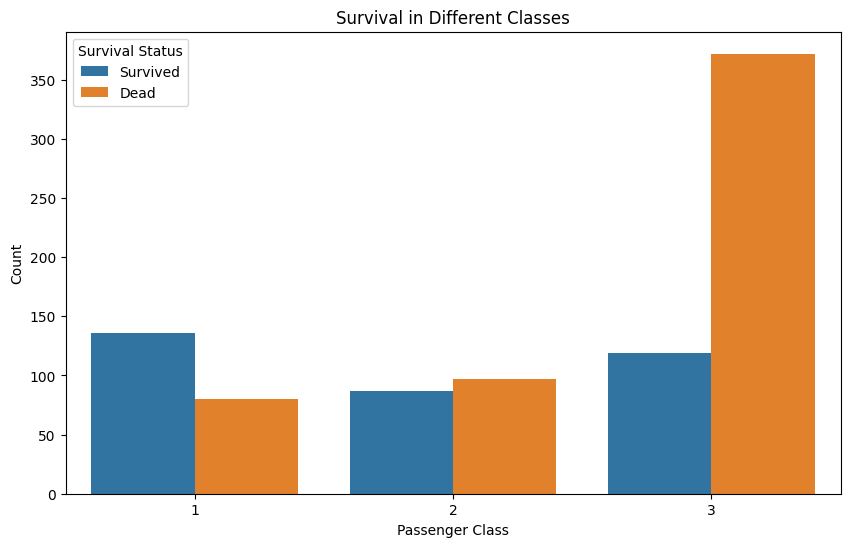

In [13]:
# Create a new column for survival status
data['Survival Status'] = data['Survived'].map({0: 'Dead', 1: 'Survived'})

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survival Status', data=data)
plt.title('Survival in Different Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Készítsünk egy kördiagrammot ami bemutatja a túlélők arányát a férfiak és a nők között


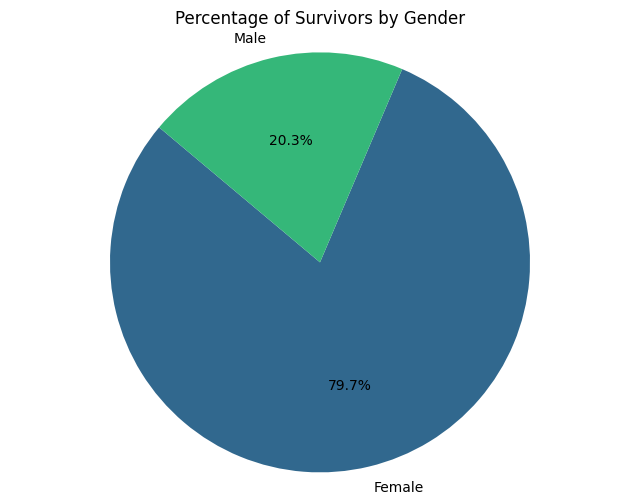

In [16]:
# Calculate the percentage of survivors for each gender
survival_rate = data.groupby('Sex')['Survived'].mean() * 100

# Map the gender values back to 'male' and 'female'
survival_rate.index = survival_rate.index.map({1: 'Male', 0: 'Female'})

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_rate, labels=survival_rate.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(survival_rate)))
plt.title('Percentage of Survivors by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Készítsünk egy egyszerű gépi tanulási modellt, ami egy új utasnak meghatározza, hogy túlélte voltna-e a katasztrófát
pl döntési fa

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



Szeparáljuk az adatot két részre. Az első legyen az amiből jósolni szeretnénk a második pedig az amit jósolni szeretnénk
x = Pclass, sex, age, SibSp, Parch, Fare
y = survived

In [21]:
# Define the features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[features]
y = data['Survived']

Szeparáljuk az adatokat tanító és validálóhalmazokra.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tanítsuk be a döntési fát

In [23]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Ellenőrizzük az eredményt

In [24]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


Hozzunk létre egy függvényt ami egy új utasról megjósolja, hogy túlélte volna-e a szerencsétlenséget


In [26]:

def predict_survival(pclass, sex, age, sibsp, parch, fare):
    new_passenger = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare]
    })
    prediction = clf.predict(new_passenger)
    return 'Survived' if prediction[0] == 1 else 'Did not survive'

In [27]:

# Example usage
print(predict_survival(3, 0, 22, 1, 2, 7.5))  # Example passenger

Survived
